**PAVAN MAHALLE**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
ds=pd.read_csv('/Unemployment in India.csv')
print("UNEMPLOYMENT IN INDIA")
ds.head()

UNEMPLOYMENT IN INDIA


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
print(ds.describe)

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               N

In [10]:
print("checking for missing value")
ds.isnull().sum()

checking for missing value


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
ds.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
ds.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed",
            "Estimated Labour participated Rate","Area"]

In [13]:
print(ds)

             States         Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh   31-05-2019   Monthly                         3.65   
1    Andhra Pradesh   30-06-2019   Monthly                         3.05   
2    Andhra Pradesh   31-07-2019   Monthly                         3.75   
3    Andhra Pradesh   31-08-2019   Monthly                         3.32   
4    Andhra Pradesh   30-09-2019   Monthly                         5.17   
..              ...          ...       ...                          ...   
763             NaN          NaN       NaN                          NaN   
764             NaN          NaN       NaN                          NaN   
765             NaN          NaN       NaN                          NaN   
766             NaN          NaN       NaN                          NaN   
767             NaN          NaN       NaN                          NaN   

     Estimated Employed  Estimated Labour participated Rate   Area  
0            11999139.0       

In [14]:
ds.isnull().sum()

States                                28
Date                                  28
Frequency                             28
Estimated Unemployment Rate           28
Estimated Employed                    28
Estimated Labour participated Rate    28
Area                                  28
dtype: int64

In [15]:
ds.corr()

<ipython-input-15-31b754434382>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,Estimated Unemployment Rate,Estimated Employed,Estimated Labour participated Rate
Estimated Unemployment Rate,1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour participated Rate,0.002558,0.011300,1.000000


<ipython-input-16-108f0eca9444>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),cmap="crest",annot=True)


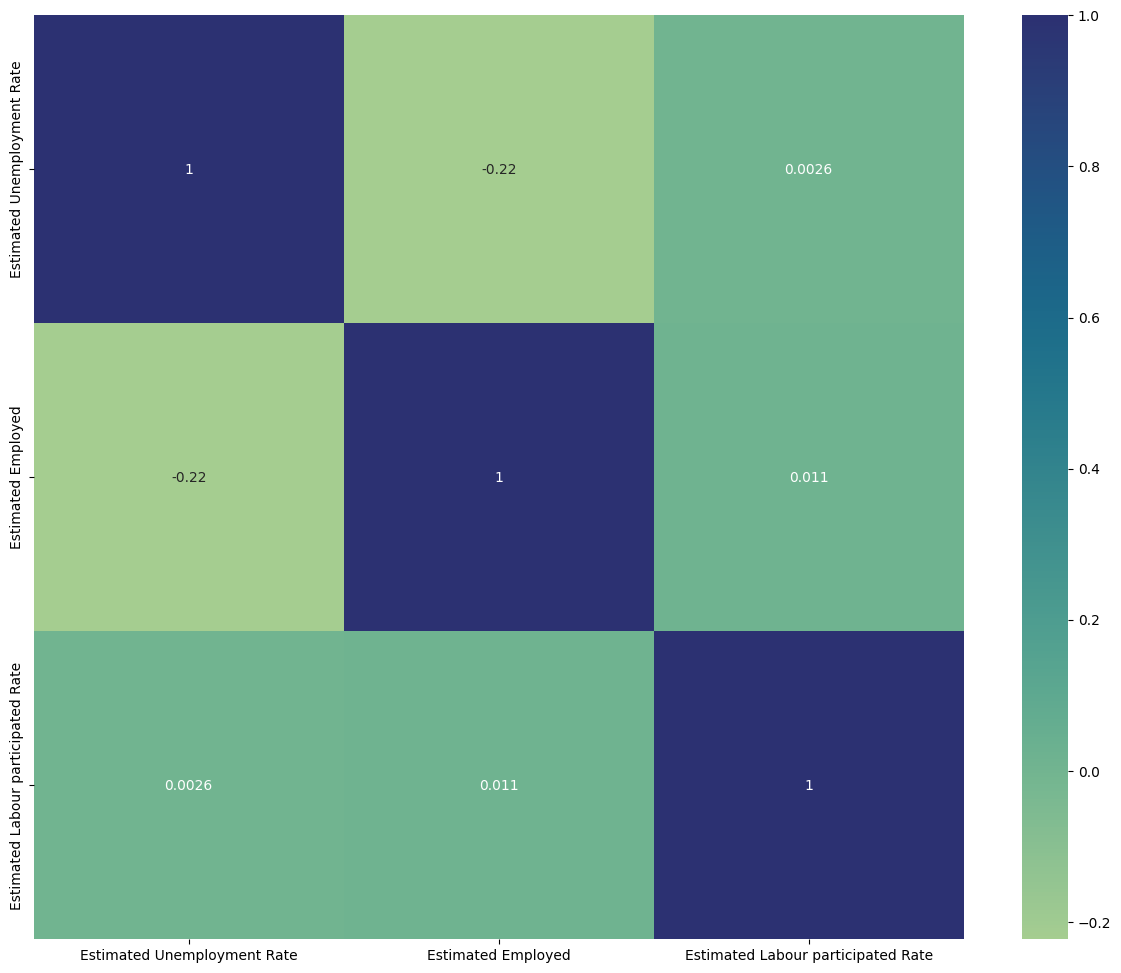

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(ds.corr(),cmap="crest",annot=True)
plt.show()

In [17]:
ds.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour participated Rate', 'Area'],
      dtype='object')

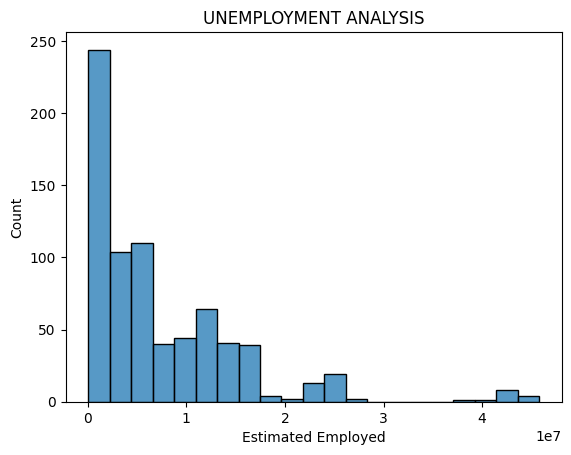

In [18]:
ds.columns=["States","Date","Frequency","Estimated Unemployment Rate",
       "Estimated Employed","Estimated Labour participated Rate","Area"]
plt.title("UNEMPLOYMENT ANALYSIS")
sns.histplot(x="Estimated Employed",multiple="stack",data=ds)
plt.show()

In [19]:
import plotly.express as px
fig = px.box(ds, x="States", y="Estimated Unemployment Rate", color="States", title="UNEMPLOYMENT ANALYSIS")
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

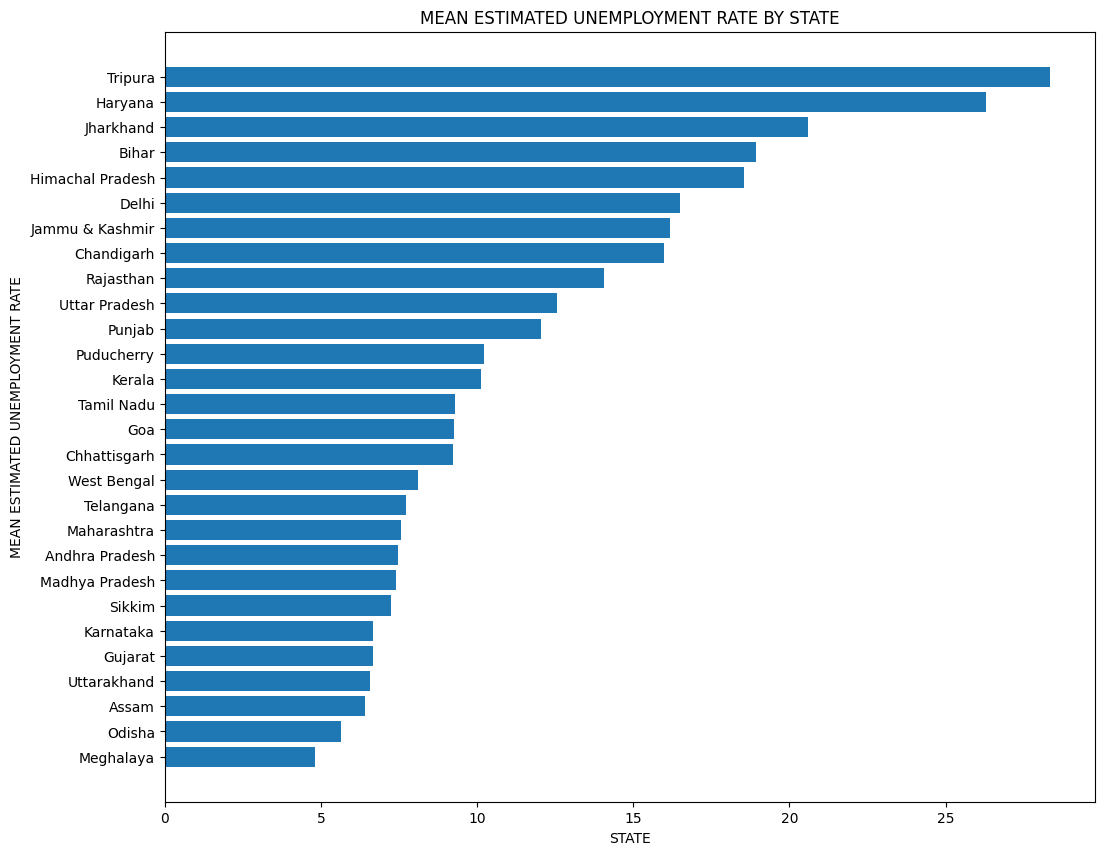

In [20]:
ds_mean=ds.groupby("States")["Estimated Unemployment Rate"].mean().sort_values(ascending=True)
plt.figure(figsize=(12,10))
plt.barh(ds_mean.index,ds_mean.values)
plt.title("MEAN ESTIMATED UNEMPLOYMENT RATE BY STATE")
plt.xlabel("STATE")
plt.ylabel("MEAN ESTIMATED UNEMPLOYMENT RATE")
plt.show()

In [21]:
plot_unemployed = ds[["Estimated Unemployment Rate","States"]]
ds_unemployed = plot_unemployed.groupby("States").mean().reset_index()

ds_unemployed = ds_unemployed.sort_values("Estimated Unemployment Rate")

fig = px.bar(ds_unemployed, x="States",y="Estimated Unemployment Rate",color = "States",title = "AVERAGE UNEMPLOYMENT RATE ANALYSIS  PER STATE")

fig.show()

In [22]:
import plotly.express as px
ds_unem=ds[["States","Date","Frequency","Estimated Unemployment Rate",
       "Estimated Employed","Estimated Labour participated Rate","Area"]]
unemployed=ds_unem.groupby(["States"])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemployed, path=["States"], values="Estimated Unemployment Rate",title="UNEMPLOYMENT RATE IN STATES",
                  height=800)
fig.show()

Text(0, 0.5, 'ESTIMATED UNEMPLOYMENT RATE')

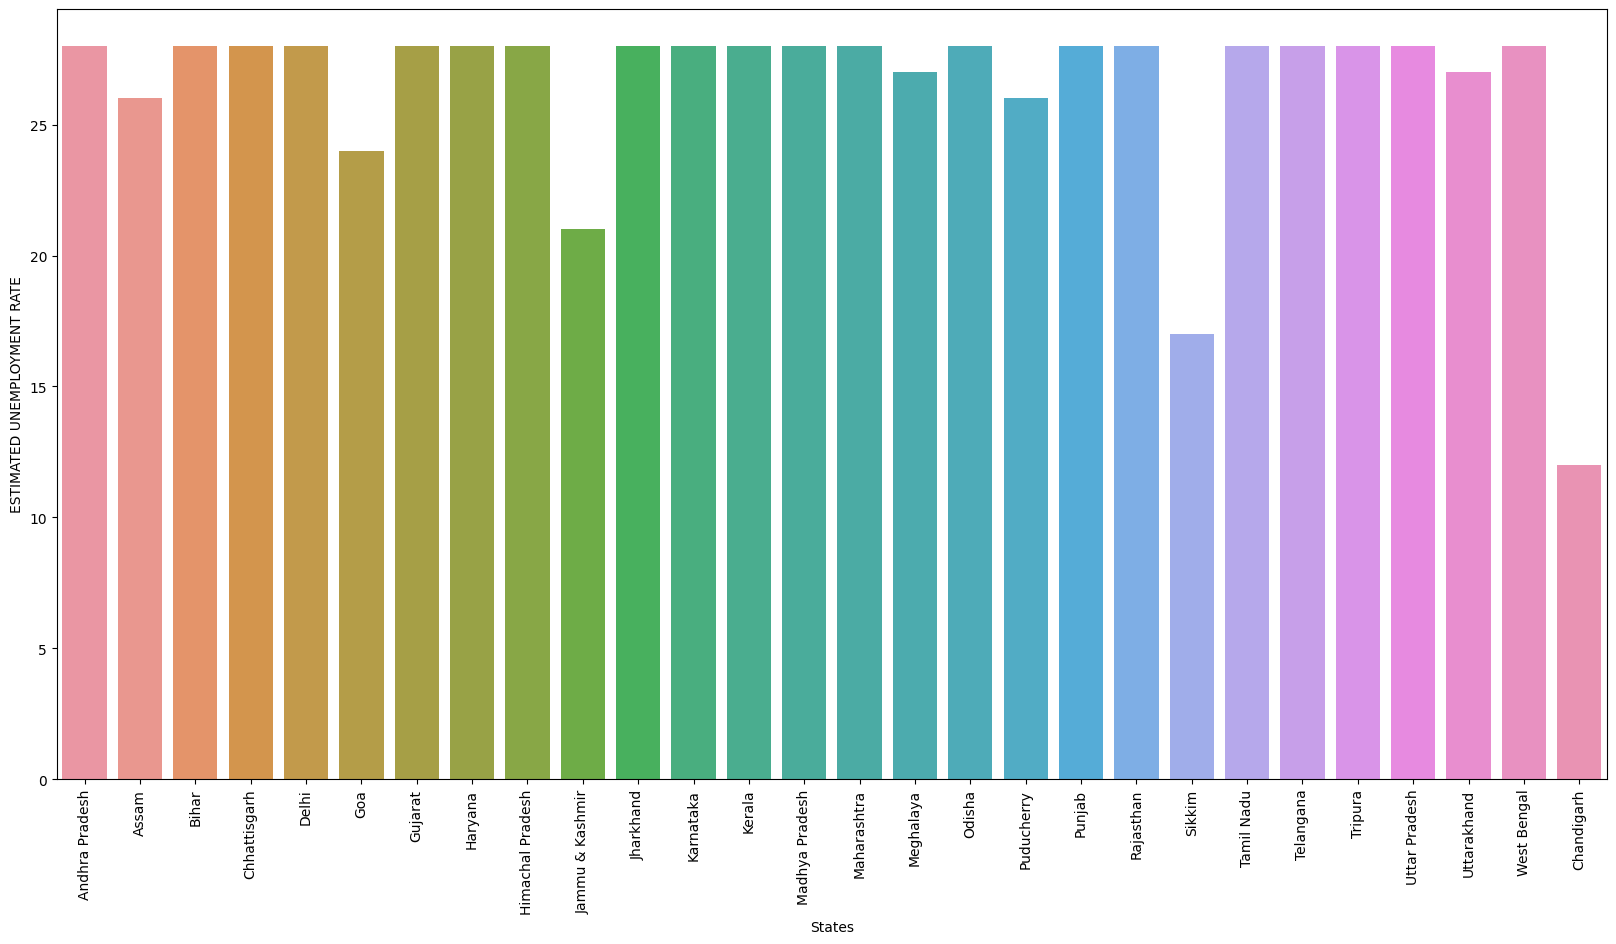

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='States',data=ds)
plt.xticks(rotation=90)
plt.ylabel("ESTIMATED UNEMPLOYMENT RATE")